In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

In [3]:
df_1 = snp = pd.read_csv("../../NFL Data/Data/plays.csv")
df_2 = snp = pd.read_csv("../../NFL Data/Data/players.csv")

In [4]:
df_1

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,...,penaltyCodes,penaltyJerseyNumbers,penaltyYards,preSnapHomeScore,preSnapVisitorScore,passResult,kickLength,kickReturnYardage,playResult,absoluteYardlineNumber
0,2018090600,37,J.Elliott kicks 65 yards from PHI 35 to end zo...,1,0,0,PHI,Kickoff,Touchback,44966.0,...,NaN,NaN,NaN,0,0,NaN,66.0,NaN,40,45
1,2018090600,366,"(9:20) C.Johnston punts 56 yards to ATL 36, Ce...",1,4,4,PHI,Punt,Return,45603.0,...,UNSd,PHI 18,-15.0,0,0,NaN,56.0,5.0,36,18
2,2018090600,658,"(5:03) M.Bryant 21 yard field goal is GOOD, Ce...",1,4,3,ATL,Field Goal,Kick Attempt Good,27091.0,...,NaN,NaN,NaN,0,0,NaN,21.0,NaN,0,13
3,2018090600,677,M.Bosher kicks 64 yards from ATL 35 to PHI 1. ...,1,0,0,ATL,Kickoff,Return,37267.0,...,NaN,NaN,NaN,0,3,NaN,64.0,30.0,34,75
4,2018090600,872,"(:33) C.Johnston punts 65 yards to end zone, C...",1,4,18,PHI,Punt,Touchback,45603.0,...,NaN,NaN,NaN,0,3,NaN,65.0,NaN,45,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19974,2021010315,3683,J.Myers kicks 65 yards from SEA 35 to end zone...,4,0,0,SEA,Kickoff,Touchback,41175.0,...,NaN,NaN,NaN,16,19,NaN,75.0,NaN,40,75
19975,2021010315,3870,"J.Myers extra point is GOOD, Center-T.Ott, Hol...",4,0,0,SEA,Extra Point,Kick Attempt Good,41175.0,...,NaN,NaN,NaN,16,25,NaN,NaN,NaN,0,25
19976,2021010315,3886,J.Myers kicks 65 yards from SEA 35 to end zone...,4,0,0,SEA,Kickoff,Touchback,41175.0,...,NaN,NaN,NaN,16,26,NaN,75.0,NaN,40,75
19977,2021010315,4166,"T.Vizcaino extra point is GOOD, Center-C.Holba...",4,0,0,SF,Extra Point,Kick Attempt Good,47590.0,...,NaN,NaN,NaN,22,26,NaN,NaN,NaN,0,95


In [5]:
df_2.head()

,nflId,height,weight,birthDate,collegeName,Position,displayName
0,42901,6-1,208,1992-07-25,James Madison,SS,Dean Marlowe
1,43501,6-0,220,1994-08-11,Central Michigan,FS,Kavon Frazier
2,43534,6-0,205,1993-06-02,Illinois,SS,Clayton Fejedelem
3,43535,6-1,235,1992-12-22,Temple,MLB,Tyler Matakevich
4,44174,6-1,236,1993-02-22,Texas Tech,ILB,Sam Eguavoen


In [6]:
def ft_in(x):
    if '-' in x:
        meas = x.split('-')
        inches = int(meas[0])*12+int(meas[1])
        return inches
    else:
        return int(x)

In [7]:
df_2['height'] = df_2['height'].apply(ft_in)

In [8]:
df_2

,nflId,height,weight,birthDate,collegeName,Position,displayName
0,42901,73,208,1992-07-25,James Madison,SS,Dean Marlowe
1,43501,72,220,1994-08-11,Central Michigan,FS,Kavon Frazier
2,43534,72,205,1993-06-02,Illinois,SS,Clayton Fejedelem
3,43535,73,235,1992-12-22,Temple,MLB,Tyler Matakevich
4,44174,73,236,1993-02-22,Texas Tech,ILB,Sam Eguavoen
...,...,...,...,...,...,...,...
2727,33216,75,320,06/16/1986,Central Florida,G,Josh Sitton
2728,33184,75,265,05/02/1985,Winston-Salem State,DE,William Hayes
2729,45651,69,198,06/16/1993,Iowa,WR,Riley McCarron
2730,41284,73,230,1992-10-20,LSU,RB,Jeremy Hill


In [9]:
play_fieldgoal = df_1.loc[df_1['specialTeamsPlayType']=="Field Goal"]

In [10]:
play_fieldgoal

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,...,penaltyCodes,penaltyJerseyNumbers,penaltyYards,preSnapHomeScore,preSnapVisitorScore,passResult,kickLength,kickReturnYardage,playResult,absoluteYardlineNumber
2,2018090600,658,"(5:03) M.Bryant 21 yard field goal is GOOD, Ce...",1,4,3,ATL,Field Goal,Kick Attempt Good,27091.0,...,NaN,NaN,NaN,0,0,NaN,21.0,NaN,0,13
6,2018090600,1368,"(6:12) J.Elliott 26 yard field goal is GOOD, C...",2,4,8,PHI,Field Goal,Kick Attempt Good,44966.0,...,NaN,NaN,NaN,0,3,NaN,26.0,NaN,0,18
8,2018090600,1587,"(2:13) M.Bryant 52 yard field goal is GOOD, Ce...",2,4,17,ATL,Field Goal,Kick Attempt Good,27091.0,...,NaN,NaN,NaN,3,3,NaN,52.0,NaN,0,76
33,2018090900,1226,(13:18) (Field Goal formation) J.Tucker 41 yar...,2,4,13,BAL,Field Goal,Kick Attempt Good,39470.0,...,NaN,NaN,NaN,14,0,NaN,41.0,NaN,0,33
36,2018090900,1613,(8:48) (Field Goal formation) S.Hauschka 52 ya...,2,4,9,BUF,Field Goal,Kick Attempt No Good,33469.0,...,NaN,NaN,NaN,17,0,NaN,52.0,NaN,-8,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19952,2021010315,811,"(2:13) J.Myers 36 yard field goal is GOOD, Cen...",1,4,10,SEA,Field Goal,Kick Attempt Good,41175.0,...,NaN,NaN,NaN,0,0,NaN,36.0,NaN,0,27
19955,2021010315,1243,"(9:31) J.Myers 30 yard field goal is GOOD, Cen...",2,4,3,SEA,Field Goal,Kick Attempt Good,41175.0,...,NaN,NaN,NaN,0,3,NaN,30.0,NaN,0,98
19959,2021010315,1784,"(:29) T.Vizcaino 36 yard field goal is GOOD, C...",2,4,6,SF,Field Goal,Kick Attempt Good,47590.0,...,NaN,NaN,NaN,0,6,NaN,36.0,NaN,0,28
19962,2021010315,2121,"(9:36) T.Vizcaino 47 yard field goal is GOOD, ...",3,4,8,SF,Field Goal,Kick Attempt Good,47590.0,...,NaN,NaN,NaN,3,6,NaN,47.0,NaN,0,39


In [11]:
play_fieldgoal.value_counts('specialTeamsResult')

specialTeamsResult
Kick Attempt Good           2218
Kick Attempt No Good         386
Blocked Kick Attempt          37
Non-Special Teams Result      14
Out of Bounds                  1
Downed                         1
dtype: int64

In [12]:
play_fieldgoal.loc[(play_fieldgoal['specialTeamsResult']=='Kick Attempt Good')&(play_fieldgoal['playResult']==0)]
#Here we verify that everytime the specialTeamsResult is Kick Attempt Good, the playResult is zero.


,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,...,penaltyCodes,penaltyJerseyNumbers,penaltyYards,preSnapHomeScore,preSnapVisitorScore,passResult,kickLength,kickReturnYardage,playResult,absoluteYardlineNumber
2,2018090600,658,"(5:03) M.Bryant 21 yard field goal is GOOD, Ce...",1,4,3,ATL,Field Goal,Kick Attempt Good,27091.0,...,NaN,NaN,NaN,0,0,NaN,21.0,NaN,0,13
6,2018090600,1368,"(6:12) J.Elliott 26 yard field goal is GOOD, C...",2,4,8,PHI,Field Goal,Kick Attempt Good,44966.0,...,NaN,NaN,NaN,0,3,NaN,26.0,NaN,0,18
8,2018090600,1587,"(2:13) M.Bryant 52 yard field goal is GOOD, Ce...",2,4,17,ATL,Field Goal,Kick Attempt Good,27091.0,...,NaN,NaN,NaN,3,3,NaN,52.0,NaN,0,76
33,2018090900,1226,(13:18) (Field Goal formation) J.Tucker 41 yar...,2,4,13,BAL,Field Goal,Kick Attempt Good,39470.0,...,NaN,NaN,NaN,14,0,NaN,41.0,NaN,0,33
38,2018090900,1973,(4:20) (Field Goal formation) J.Tucker 39 yard...,2,4,2,BAL,Field Goal,Kick Attempt Good,39470.0,...,NaN,NaN,NaN,17,0,NaN,39.0,NaN,0,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19952,2021010315,811,"(2:13) J.Myers 36 yard field goal is GOOD, Cen...",1,4,10,SEA,Field Goal,Kick Attempt Good,41175.0,...,NaN,NaN,NaN,0,0,NaN,36.0,NaN,0,27
19955,2021010315,1243,"(9:31) J.Myers 30 yard field goal is GOOD, Cen...",2,4,3,SEA,Field Goal,Kick Attempt Good,41175.0,...,NaN,NaN,NaN,0,3,NaN,30.0,NaN,0,98
19959,2021010315,1784,"(:29) T.Vizcaino 36 yard field goal is GOOD, C...",2,4,6,SF,Field Goal,Kick Attempt Good,47590.0,...,NaN,NaN,NaN,0,6,NaN,36.0,NaN,0,28
19962,2021010315,2121,"(9:36) T.Vizcaino 47 yard field goal is GOOD, ...",3,4,8,SF,Field Goal,Kick Attempt Good,47590.0,...,NaN,NaN,NaN,3,6,NaN,47.0,NaN,0,39


In [13]:
play_fieldgoal['playResult'].value_counts()

 0     2223
-8      358
-9       30
-10       4
-7        4
 4        3
-19       2
-11       2
 2        2
-5        2
 1        2
-12       2
 26       2
-26       2
 8        1
-16       1
-2        1
 12       1
-14       1
 14       1
-41       1
-22       1
-58       1
-33       1
-72       1
-1        1
 3        1
 7        1
-13       1
 23       1
 25       1
-31       1
-60       1
Name: playResult, dtype: int64

In [14]:
play_fieldgoal['kickLength'].value_counts()

48.0    94
42.0    93
29.0    89
33.0    88
37.0    88
39.0    88
43.0    85
46.0    85
41.0    85
45.0    82
35.0    80
47.0    79
44.0    79
40.0    77
28.0    75
30.0    74
38.0    74
31.0    72
36.0    71
50.0    69
34.0    69
32.0    67
52.0    64
26.0    64
25.0    61
22.0    60
23.0    60
27.0    57
24.0    55
21.0    54
53.0    54
49.0    53
54.0    49
51.0    47
55.0    41
20.0    40
56.0    20
57.0    17
19.0    13
58.0    12
59.0     7
62.0     4
61.0     3
63.0     3
65.0     2
60.0     1
64.0     1
67.0     1
Name: kickLength, dtype: int64

In [15]:
play_fieldgoal.value_counts('kickReturnYardage')

Series([], dtype: int64)

kickReturnYardage is a measurement which does not apply to Field Goals. We will remove this column from the data frame play_feildgoal.

In [16]:
play_fieldgoal = play_fieldgoal.drop(columns=['kickReturnYardage'])

In [17]:
play_fieldgoal.value_counts('passResult')

passResult
I     4
C     4
S     1
IN    1
dtype: int64

In [18]:
play_fieldgoal.loc[play_fieldgoal['specialTeamsResult']=='Non-Special Teams Result']
#Verified that 'passResult' is not null only in the case of a Non-Special Teams Result

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,...,gameClock,penaltyCodes,penaltyJerseyNumbers,penaltyYards,preSnapHomeScore,preSnapVisitorScore,passResult,kickLength,playResult,absoluteYardlineNumber
1087,2018092309,2100,(:03) (Field Goal formation) J.Scott Aborted. ...,2,1,10,GB,Field Goal,Non-Special Teams Result,NaN,...,00:03:00,NaN,NaN,NaN,28,10,I,NaN,0,67
1709,2018100700,1558,(5:10) (Field Goal formation) C.Bojorquez pass...,2,4,7,BUF,Field Goal,Non-Special Teams Result,NaN,...,05:10:00,NaN,NaN,NaN,7,3,I,NaN,0,98
3539,2018110409,1183,(13:14) (Field Goal formation) J.Hekker right ...,2,4,4,LA,Field Goal,Non-Special Teams Result,NaN,...,13:14:00,NaN,NaN,NaN,14,14,NaN,NaN,3,26
3757,2018111104,2472,(10:37) (Field Goal formation) L.Cooke pass sh...,3,4,4,JAX,Field Goal,Non-Special Teams Result,NaN,...,10:37:00,NaN,NaN,NaN,29,16,C,NaN,4,40
6472,2018123002,1229,(10:41) (Field Goal formation) M.Prater pass s...,2,4,3,DET,Field Goal,Non-Special Teams Result,NaN,...,10:41:00,NaN,NaN,NaN,0,7,C,NaN,8,102
8975,2019101306,2205,(:20) (Field Goal formation) J.Elliott pass sh...,2,4,4,PHI,Field Goal,Non-Special Teams Result,NaN,...,00:20:00,NaN,NaN,NaN,24,10,IN,NaN,0,89
9214,2019102001,2486,(6:42) (Field Goal formation) M.Haack up the m...,3,4,1,MIA,Field Goal,Non-Special Teams Result,NaN,...,06:42:00,NaN,NaN,NaN,9,14,NaN,NaN,2,106
9737,2019102708,3967,(3:45) (Field Goal formation) B.Kern left end ...,4,4,2,TEN,Field Goal,Non-Special Teams Result,NaN,...,03:45:00,NaN,NaN,NaN,27,23,NaN,NaN,0,38
9899,2019110300,2264,(9:03) (Field Goal formation) L.Cooke sacked a...,3,4,14,JAX,Field Goal,Non-Special Teams Result,NaN,...,09:03:00,NaN,NaN,NaN,3,9,S,NaN,-19,79
10477,2019111007,3980,(1:27) (Field Goal formation) D.Colquitt Abort...,4,4,7,KC,Field Goal,Non-Special Teams Result,NaN,...,01:27:00,ING,KC 2,-10.0,27,32,I,NaN,-10,39


In [19]:
play_fieldgoal.value_counts('returnerId')

returnerId
46086    1
45150    1
dtype: int64

There is a returner Id for two plays with playResult = 'Kick Attempt No Good'. These are row 6013 and 9028. This needs to be understood. There is no result for kickReturnYardage on these, and they are not classified as intercepted. 

In [20]:
play_fieldgoal.value_counts('down')

down
4    2418
2      88
1      79
3      72
dtype: int64

Note that field goals were attempted on all downs (not just 4th down).

In [21]:
play_fieldgoal

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,...,gameClock,penaltyCodes,penaltyJerseyNumbers,penaltyYards,preSnapHomeScore,preSnapVisitorScore,passResult,kickLength,playResult,absoluteYardlineNumber
2,2018090600,658,"(5:03) M.Bryant 21 yard field goal is GOOD, Ce...",1,4,3,ATL,Field Goal,Kick Attempt Good,27091.0,...,05:03:00,NaN,NaN,NaN,0,0,NaN,21.0,0,13
6,2018090600,1368,"(6:12) J.Elliott 26 yard field goal is GOOD, C...",2,4,8,PHI,Field Goal,Kick Attempt Good,44966.0,...,06:12:00,NaN,NaN,NaN,0,3,NaN,26.0,0,18
8,2018090600,1587,"(2:13) M.Bryant 52 yard field goal is GOOD, Ce...",2,4,17,ATL,Field Goal,Kick Attempt Good,27091.0,...,02:13:00,NaN,NaN,NaN,3,3,NaN,52.0,0,76
33,2018090900,1226,(13:18) (Field Goal formation) J.Tucker 41 yar...,2,4,13,BAL,Field Goal,Kick Attempt Good,39470.0,...,13:18:00,NaN,NaN,NaN,14,0,NaN,41.0,0,33
36,2018090900,1613,(8:48) (Field Goal formation) S.Hauschka 52 ya...,2,4,9,BUF,Field Goal,Kick Attempt No Good,33469.0,...,08:48:00,NaN,NaN,NaN,17,0,NaN,52.0,-8,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19952,2021010315,811,"(2:13) J.Myers 36 yard field goal is GOOD, Cen...",1,4,10,SEA,Field Goal,Kick Attempt Good,41175.0,...,02:13:00,NaN,NaN,NaN,0,0,NaN,36.0,0,27
19955,2021010315,1243,"(9:31) J.Myers 30 yard field goal is GOOD, Cen...",2,4,3,SEA,Field Goal,Kick Attempt Good,41175.0,...,09:31:00,NaN,NaN,NaN,0,3,NaN,30.0,0,98
19959,2021010315,1784,"(:29) T.Vizcaino 36 yard field goal is GOOD, C...",2,4,6,SF,Field Goal,Kick Attempt Good,47590.0,...,00:29:00,NaN,NaN,NaN,0,6,NaN,36.0,0,28
19962,2021010315,2121,"(9:36) T.Vizcaino 47 yard field goal is GOOD, ...",3,4,8,SF,Field Goal,Kick Attempt Good,47590.0,...,09:36:00,NaN,NaN,NaN,3,6,NaN,47.0,0,39


We would now like to bring in player information for both the kicker and the blocker. This is done by merging with the players data frame along the nflId.

In [22]:
play_fieldgoal_players = pd.merge(play_fieldgoal, df_2[['nflId', 'height', 'weight','Position', 'displayName']], how = 'left',
             left_on = 'kickerId', right_on = 'nflId')

In [23]:
play_fieldgoal_players

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,...,preSnapVisitorScore,passResult,kickLength,playResult,absoluteYardlineNumber,nflId,height,weight,Position,displayName
0,2018090600,658,"(5:03) M.Bryant 21 yard field goal is GOOD, Ce...",1,4,3,ATL,Field Goal,Kick Attempt Good,27091.0,...,0,NaN,21.0,0,13,27091.0,69.0,203.0,K,Matt Bryant
1,2018090600,1368,"(6:12) J.Elliott 26 yard field goal is GOOD, C...",2,4,8,PHI,Field Goal,Kick Attempt Good,44966.0,...,3,NaN,26.0,0,18,44966.0,69.0,167.0,K,Jake Elliott
2,2018090600,1587,"(2:13) M.Bryant 52 yard field goal is GOOD, Ce...",2,4,17,ATL,Field Goal,Kick Attempt Good,27091.0,...,3,NaN,52.0,0,76,27091.0,69.0,203.0,K,Matt Bryant
3,2018090900,1226,(13:18) (Field Goal formation) J.Tucker 41 yar...,2,4,13,BAL,Field Goal,Kick Attempt Good,39470.0,...,0,NaN,41.0,0,33,39470.0,73.0,183.0,K,Justin Tucker
4,2018090900,1613,(8:48) (Field Goal formation) S.Hauschka 52 ya...,2,4,9,BUF,Field Goal,Kick Attempt No Good,33469.0,...,0,NaN,52.0,-8,76,33469.0,76.0,210.0,K,Stephen Hauschka
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2652,2021010315,811,"(2:13) J.Myers 36 yard field goal is GOOD, Cen...",1,4,10,SEA,Field Goal,Kick Attempt Good,41175.0,...,0,NaN,36.0,0,27,41175.0,70.0,190.0,K,Jason Myers
2653,2021010315,1243,"(9:31) J.Myers 30 yard field goal is GOOD, Cen...",2,4,3,SEA,Field Goal,Kick Attempt Good,41175.0,...,3,NaN,30.0,0,98,41175.0,70.0,190.0,K,Jason Myers
2654,2021010315,1784,"(:29) T.Vizcaino 36 yard field goal is GOOD, C...",2,4,6,SF,Field Goal,Kick Attempt Good,47590.0,...,6,NaN,36.0,0,28,47590.0,74.0,205.0,K,Tristan Vizcaino
2655,2021010315,2121,"(9:36) T.Vizcaino 47 yard field goal is GOOD, ...",3,4,8,SF,Field Goal,Kick Attempt Good,47590.0,...,6,NaN,47.0,0,39,47590.0,74.0,205.0,K,Tristan Vizcaino


In [24]:
#we rename the column headers containing player information to indicate this corresponds to the kicker.

play_fieldgoal_players=play_fieldgoal_players.rename(columns = {"height": 'kicker_height', "weight": 'kicker_weight', "Position": 'kicker_position', "displayName": 'kicker_name'})

#drop the column nflId which duplicates the information in the kickerId column.

play_fieldgoal_players=play_fieldgoal_players.drop(columns=['nflId'])

In [25]:
play_fieldgoal_players

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,...,preSnapHomeScore,preSnapVisitorScore,passResult,kickLength,playResult,absoluteYardlineNumber,kicker_height,kicker_weight,kicker_position,kicker_name
0,2018090600,658,"(5:03) M.Bryant 21 yard field goal is GOOD, Ce...",1,4,3,ATL,Field Goal,Kick Attempt Good,27091.0,...,0,0,NaN,21.0,0,13,69.0,203.0,K,Matt Bryant
1,2018090600,1368,"(6:12) J.Elliott 26 yard field goal is GOOD, C...",2,4,8,PHI,Field Goal,Kick Attempt Good,44966.0,...,0,3,NaN,26.0,0,18,69.0,167.0,K,Jake Elliott
2,2018090600,1587,"(2:13) M.Bryant 52 yard field goal is GOOD, Ce...",2,4,17,ATL,Field Goal,Kick Attempt Good,27091.0,...,3,3,NaN,52.0,0,76,69.0,203.0,K,Matt Bryant
3,2018090900,1226,(13:18) (Field Goal formation) J.Tucker 41 yar...,2,4,13,BAL,Field Goal,Kick Attempt Good,39470.0,...,14,0,NaN,41.0,0,33,73.0,183.0,K,Justin Tucker
4,2018090900,1613,(8:48) (Field Goal formation) S.Hauschka 52 ya...,2,4,9,BUF,Field Goal,Kick Attempt No Good,33469.0,...,17,0,NaN,52.0,-8,76,76.0,210.0,K,Stephen Hauschka
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2652,2021010315,811,"(2:13) J.Myers 36 yard field goal is GOOD, Cen...",1,4,10,SEA,Field Goal,Kick Attempt Good,41175.0,...,0,0,NaN,36.0,0,27,70.0,190.0,K,Jason Myers
2653,2021010315,1243,"(9:31) J.Myers 30 yard field goal is GOOD, Cen...",2,4,3,SEA,Field Goal,Kick Attempt Good,41175.0,...,0,3,NaN,30.0,0,98,70.0,190.0,K,Jason Myers
2654,2021010315,1784,"(:29) T.Vizcaino 36 yard field goal is GOOD, C...",2,4,6,SF,Field Goal,Kick Attempt Good,47590.0,...,0,6,NaN,36.0,0,28,74.0,205.0,K,Tristan Vizcaino
2655,2021010315,2121,"(9:36) T.Vizcaino 47 yard field goal is GOOD, ...",3,4,8,SF,Field Goal,Kick Attempt Good,47590.0,...,3,6,NaN,47.0,0,39,74.0,205.0,K,Tristan Vizcaino


We now add the kick blocker's player information. 

In [26]:
play_fieldgoal_players_both = pd.merge(play_fieldgoal_players, df_2[['nflId', 'height', 'weight','Position', 'displayName']], how = 'left',
             left_on = 'kickBlockerId', right_on = 'nflId')

In [27]:
fg=play_fieldgoal_players_both.rename(columns = {"height": 'blocker_height', "weight": 'blocker_weight', "Position": 'blocker_position', "displayName": 'blocker_name'})



In [28]:
fg=fg.drop(columns=['nflId'])

fg

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,...,playResult,absoluteYardlineNumber,kicker_height,kicker_weight,kicker_position,kicker_name,blocker_height,blocker_weight,blocker_position,blocker_name
0,2018090600,658,"(5:03) M.Bryant 21 yard field goal is GOOD, Ce...",1,4,3,ATL,Field Goal,Kick Attempt Good,27091.0,...,0,13,69.0,203.0,K,Matt Bryant,NaN,NaN,NaN,NaN
1,2018090600,1368,"(6:12) J.Elliott 26 yard field goal is GOOD, C...",2,4,8,PHI,Field Goal,Kick Attempt Good,44966.0,...,0,18,69.0,167.0,K,Jake Elliott,NaN,NaN,NaN,NaN
2,2018090600,1587,"(2:13) M.Bryant 52 yard field goal is GOOD, Ce...",2,4,17,ATL,Field Goal,Kick Attempt Good,27091.0,...,0,76,69.0,203.0,K,Matt Bryant,NaN,NaN,NaN,NaN
3,2018090900,1226,(13:18) (Field Goal formation) J.Tucker 41 yar...,2,4,13,BAL,Field Goal,Kick Attempt Good,39470.0,...,0,33,73.0,183.0,K,Justin Tucker,NaN,NaN,NaN,NaN
4,2018090900,1613,(8:48) (Field Goal formation) S.Hauschka 52 ya...,2,4,9,BUF,Field Goal,Kick Attempt No Good,33469.0,...,-8,76,76.0,210.0,K,Stephen Hauschka,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2652,2021010315,811,"(2:13) J.Myers 36 yard field goal is GOOD, Cen...",1,4,10,SEA,Field Goal,Kick Attempt Good,41175.0,...,0,27,70.0,190.0,K,Jason Myers,NaN,NaN,NaN,NaN
2653,2021010315,1243,"(9:31) J.Myers 30 yard field goal is GOOD, Cen...",2,4,3,SEA,Field Goal,Kick Attempt Good,41175.0,...,0,98,70.0,190.0,K,Jason Myers,NaN,NaN,NaN,NaN
2654,2021010315,1784,"(:29) T.Vizcaino 36 yard field goal is GOOD, C...",2,4,6,SF,Field Goal,Kick Attempt Good,47590.0,...,0,28,74.0,205.0,K,Tristan Vizcaino,NaN,NaN,NaN,NaN
2655,2021010315,2121,"(9:36) T.Vizcaino 47 yard field goal is GOOD, ...",3,4,8,SF,Field Goal,Kick Attempt Good,47590.0,...,0,39,74.0,205.0,K,Tristan Vizcaino,NaN,NaN,NaN,NaN


In [29]:
fg.columns

Index(['gameId', 'playId', 'playDescription', 'quarter', 'down', 'yardsToGo',
       'possessionTeam', 'specialTeamsPlayType', 'specialTeamsResult',
       'kickerId', 'returnerId', 'kickBlockerId', 'yardlineSide',
       'yardlineNumber', 'gameClock', 'penaltyCodes', 'penaltyJerseyNumbers',
       'penaltyYards', 'preSnapHomeScore', 'preSnapVisitorScore', 'passResult',
       'kickLength', 'playResult', 'absoluteYardlineNumber', 'kicker_height',
       'kicker_weight', 'kicker_position', 'kicker_name', 'blocker_height',
       'blocker_weight', 'blocker_position', 'blocker_name'],
      dtype='object')

We would like to preprocess the columns for clustering. We need to reformulate objects and decide what to drop, fill empty values, etc. 
First we check the dtype of each column.

In [30]:
fg.dtypes

gameId                      int64
playId                      int64
playDescription            object
quarter                     int64
down                        int64
yardsToGo                   int64
possessionTeam             object
specialTeamsPlayType       object
specialTeamsResult         object
kickerId                  float64
returnerId                 object
kickBlockerId             float64
yardlineSide               object
yardlineNumber              int64
gameClock                  object
penaltyCodes               object
penaltyJerseyNumbers       object
penaltyYards              float64
preSnapHomeScore            int64
preSnapVisitorScore         int64
passResult                 object
kickLength                float64
playResult                  int64
absoluteYardlineNumber      int64
kicker_height             float64
kicker_weight             float64
kicker_position            object
kicker_name                object
blocker_height            float64
blocker_weight

These are the additional comlumns when compared with the Extra_Point notebook. 

down 

yardsToGo

returnerId Note: There were only two weird cases with this. I will drop this from the clustering. 

kickLength

playResult Note: Anytime there was a play whose 'specailTeamsPlayResult' was labeled as 'Kick Attempt Good', the 'playResult' was zero yards. There are five other plays which were not labeled as 'Kick Attempt Good' and where the 'playResult' was zero yards. 


In [31]:
fg['penaltyYards'].value_counts()

 0.0     33
 15.0     3
 10.0     2
-10.0     1
-15.0     1
Name: penaltyYards, dtype: int64

Note: There are 33 cases of a zero yards penalty. We will now fill in all the rows without penalties with a zero yard penalty as well. 

In [32]:
fg['penaltyYards']=fg['penaltyYards'].fillna(0)

In the Extra_Point notebook we verified that gameClock was keeping time on the clock in each quarter. We also verified that there are no miliseconds. We copy the function we defined there to turn our gameClock enties from an object to an int and also to calculate time from the start of the game by using the quarter. 

In [33]:
def clock(x):
    gameClock = fg.loc[x]['gameClock']
    quater = fg.loc[x]['quarter']
    
    gameClock_split = gameClock.split(':')
    
    minutes = int(gameClock_split[0])
    seconds = int(gameClock_split[1])
    
    total_minutes = minutes + 15 * (quater - 1)
    
    return (total_minutes * 60) + seconds

Apply this function to the rows of fg and put the outcome in a new column labeled 'gameClockSeconds'.

In [34]:
fg['gameClockSeconds'] = fg.index.map(clock)


In [35]:
fg['gameClockSeconds']

0        303
1       1272
2       1033
3       1698
4       1428
        ... 
2652     133
2653    1471
2654     929
2655    2376
2656    2183
Name: gameClockSeconds, Length: 2657, dtype: int64

We now deal with categorical variables by using Label Encoder. (We have more than two labels for the categorical variables.) 

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
le_specailTeamsResult = LabelEncoder()
le_penaltyCodes = LabelEncoder()

In [38]:
# We fill the rows which do not contain a penalty with the penalty code 'No Penalty'.
fg['penaltyCodes']=fg['penaltyCodes'].fillna('No Penalty')

fg['penaltyCodes'].value_counts()

No Penalty    2617
DOF             21
ILF              5
UNRd             5
RNK              3
IBW              2
LEA              1
ING              1
OH               1
UNR              1
Name: penaltyCodes, dtype: int64

In [39]:
new_specailTeamsResult = le_specailTeamsResult.fit_transform(fg['specialTeamsResult'])

new_penaltyCodes = le_penaltyCodes.fit_transform(fg['penaltyCodes'])

In [40]:
#create a new data frame where we drop the categorical variables without the label encoder and add the label encoded columns. 

fg_cluster = fg.drop(['specialTeamsResult', 'penaltyCodes'], axis=1)

fg_cluster['specialTeamsResults'] = new_specailTeamsResult
fg_cluster['penaltyCodes'] = new_penaltyCodes


Now we list the columns we want to use for the clustering. 

In [41]:
useful_cols_1 = ['specialTeamsResults', 'yardlineNumber', 
               'gameClockSeconds', 'penaltyCodes', 
               'penaltyYards', 'preSnapHomeScore', 
               'preSnapVisitorScore', 'kicker_height', 
               'kicker_weight', 'blocker_height', 
               'blocker_weight', 'down',
              'yardsToGo', 'kickLength',
              'playResult'] 

In [42]:
fg_cluster_1 = fg_cluster[useful_cols_1]

In [43]:
fg_cluster_1.dtypes

specialTeamsResults      int64
yardlineNumber           int64
gameClockSeconds         int64
penaltyCodes             int64
penaltyYards           float64
preSnapHomeScore         int64
preSnapVisitorScore      int64
kicker_height          float64
kicker_weight          float64
blocker_height         float64
blocker_weight         float64
down                     int64
yardsToGo                int64
kickLength             float64
playResult               int64
dtype: object

In [44]:
fg_cluster_1.isna().sum()

specialTeamsResults       0
yardlineNumber            0
gameClockSeconds          0
penaltyCodes              0
penaltyYards              0
preSnapHomeScore          0
preSnapVisitorScore       0
kicker_height            14
kicker_weight            14
blocker_height         2620
blocker_weight         2620
down                      0
yardsToGo                 0
kickLength               51
playResult                0
dtype: int64

We need to understand the cases where 'kickLength' is NaN. It looks like these are just missing, but there is no underlying reason.

In [45]:
fg_cluster_1.loc[fg_cluster_1['kickLength'].isna()]

,specialTeamsResults,yardlineNumber,gameClockSeconds,penaltyCodes,penaltyYards,preSnapHomeScore,preSnapVisitorScore,kicker_height,kicker_weight,blocker_height,blocker_weight,down,yardsToGo,kickLength,playResult
8,0,25,3613,5,0.0,21,21,72.0,202.0,76.0,252.0,3,11,NaN,-8
105,0,25,1185,1,10.0,17,14,73.0,183.0,74.0,202.0,4,7,NaN,-26
133,4,43,903,5,0.0,28,10,NaN,NaN,NaN,NaN,1,10,NaN,0
229,4,12,1210,5,0.0,7,3,NaN,NaN,NaN,NaN,4,7,NaN,0
246,0,30,905,5,0.0,6,3,73.0,183.0,71.0,191.0,3,10,NaN,23
481,4,16,1694,5,0.0,14,14,NaN,NaN,NaN,NaN,4,4,NaN,3
503,4,30,2437,5,0.0,29,16,NaN,NaN,NaN,NaN,4,4,NaN,4
621,0,30,584,5,0.0,0,0,74.0,185.0,74.0,202.0,4,10,NaN,-8
691,0,31,904,5,0.0,17,13,76.0,210.0,78.0,301.0,4,11,NaN,14
742,0,29,3046,5,0.0,6,0,72.0,190.0,72.0,242.0,4,9,NaN,-8


In [46]:
fg_cluster_1_drop = fg_cluster_1.drop(['blocker_height','blocker_weight'], axis =1).dropna()

In [47]:
import hdbscan

In [48]:
clusterer = hdbscan.HDBSCAN()

In [49]:
cls = clusterer.fit(fg_cluster_1_drop)


In [50]:
clusterer.labels_.max()

4

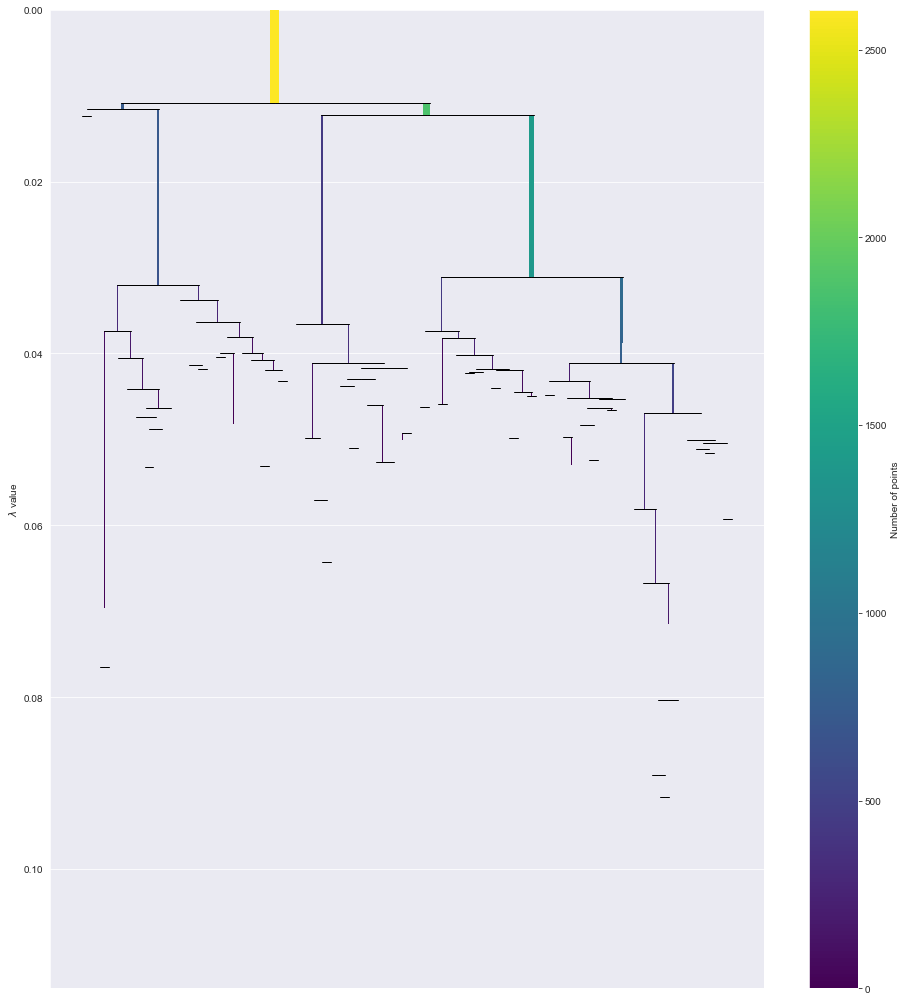

In [51]:
plt.figure(figsize = (16,18))
clusterer.condensed_tree_.plot()
plt.show()

In [52]:
clusterer = hdbscan.HDBSCAN()

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
ss = StandardScaler()

In [57]:
fg_cluster_2 = ss.fit_transform(fg_cluster_1_drop)

In [58]:
cls = clusterer.fit(fg_cluster_2)

In [59]:
clusterer.labels_.max()

5

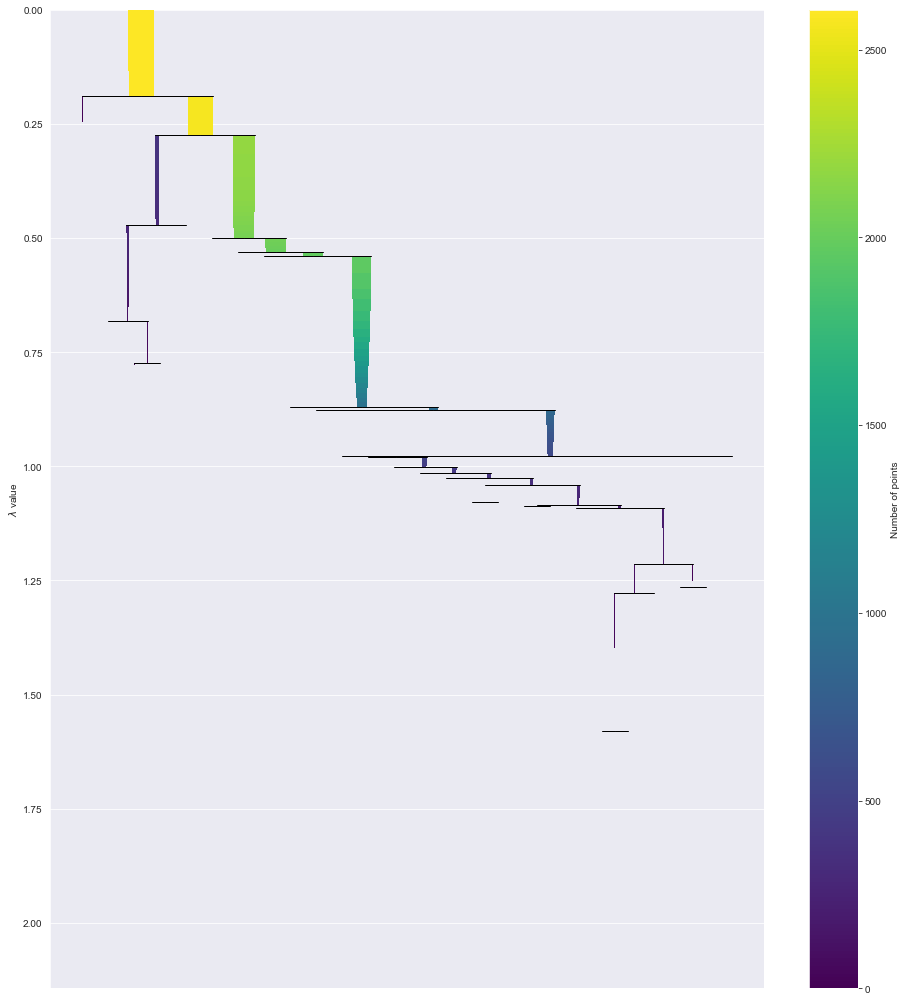

In [60]:
plt.figure(figsize = (16,18))
clusterer.condensed_tree_.plot()
plt.show()

In [62]:
cls.labels_

array([5, 5, 5, ..., 5, 5, 5])

In [63]:
fg_cluster_1_drop['cluster_id']=cls.labels_

In [65]:
fg_cluster_1_drop.value_counts('cluster_id')

cluster_id
 5    1956
 1     381
-1     203
 0      24
 4      16
 3      13
 2      13
dtype: int64

In [66]:
fg_cluster_2 = fg_cluster_1_drop

In [67]:
fg_cluster_2.loc[fg_cluster_2['cluster_id']==5]

TypeError: 'Series' objects are mutable, thus they cannot be hashed